<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



In [1]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import pandas as pd
def dif_cen(f,x,h):
  derivada=(f(x+h)-f(x-h))/(2*h)
  return derivada

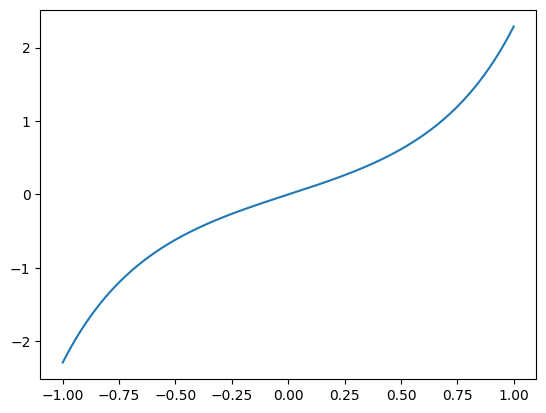

In [2]:
f=lambda x:np.exp(x**2)*np.sin(x)
x=np.linspace(-1,1,1000)
plt.figure()
plt.plot(x,f(x))

In [3]:
derivada=dif_cen(f,x,h=1E-2)

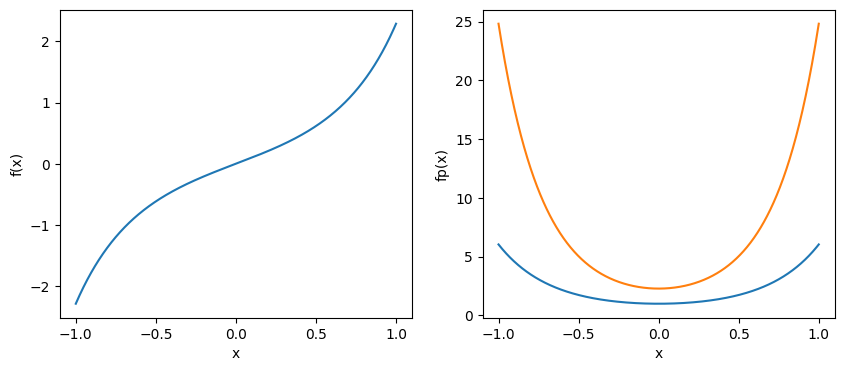

In [4]:
fig, axs =plt.subplots(figsize=(10,4), ncols=2, nrows=1)
ax=axs.flatten()
ax[0].plot(x, f(x))
ax[0].set_ylabel("f(x)")
ax[0].set_xlabel("x")

derivada = dif_cen(f, x, h=1E-2)
ax[1].plot(x, derivada)
derivada = dif_cen(f, x, h=1)
ax[1].plot(x, derivada)
ax[1].set_ylabel("fp(x)")
ax[1].set_xlabel("x")
plt.show()

In [5]:
#sympy
x=sp.Symbol('x')
f=lambda x:sp.exp(x**2)*sp.sin(x)
df=sp.diff(f(x),x,1)
df


2*x*exp(x**2)*sin(x) + exp(x**2)*cos(x)

In [6]:
def D_simbolica(fun, z, orden):
  ds = sp.diff(fun_s(z), z,1 )   # DErivada con sympy
  dsn = sp.lambdify(z,ds)
  return dsn

In [7]:
fun = lambda x:np.exp(x**2)*np.sin(x)
z=sp.Symbol("z")
fun_s = lambda z:sp.exp(z**2)*sp.sin(z)

x=np.linspace(-1, 1,1000)
derivada = dif_cen(fun, x, h=1) # Numpy
ds = D_simbolica(fun, z, 1)(x)

2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,-30.710388,-0.535997
1,42,-30.017673,-0.523907
2,75,-28.762547,-0.502001
3,108,-26.507523,-0.462644
4,142,-24.611229,-0.429547
...,...,...,...
2842,94709,4.937576,0.086177
2843,94743,6.479851,0.113095
2844,94776,7.940689,0.138591
2845,94809,9.318092,0.162631


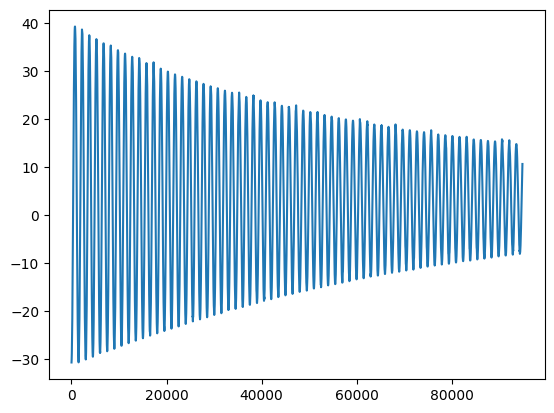

In [9]:
x=df['Tiempo[ms]'].array
y=df['AnguloDeg'].array
plt.plot(x,y)

<Axes: xlabel='Tiempo[ms]', ylabel='AnguloRad'>

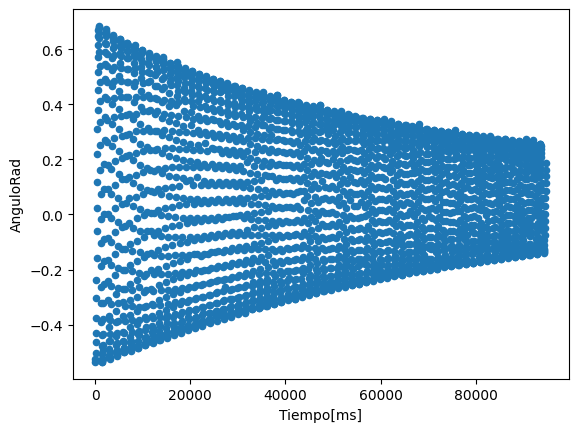

In [10]:
df.plot(x='Tiempo[ms]',y='AnguloRad',kind='scatter')

- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}
Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

In [11]:
def dif_central(x, y):
  df = pd.DataFrame({'x':x, 'y':y})
  h = df['x'].diff().mean()
  # Calcular las diferencias entre valores
  df['aprox_adelante'] = df['y'].diff().shift(-1) #se desplaza en el dtaframe hacia abajo
  df['aprox_atras'] = df['y'].diff().shift(1) #se desplaza en el dtaframe hacia arriba

  # Calculo la derivada
  df['derivada'] = (df['aprox_adelante'] - df['aprox_atras']) / (2 * h)
  df = df.dropna() # Eliminar resultados NaN

  return df[['x', 'derivada']]


x =df['Tiempo[ms]']
y= df['AnguloDeg']
R = dif_central(x, y)
print(R)


          x  derivada
2        75  0.023443
3       108  0.009621
4       142  0.011552
5       175  0.033781
6       209  0.010114
...     ...       ...
2841  94676 -0.000060
2842  94709 -0.001274
2843  94743 -0.002131
2844  94776 -0.002474
2845  94809 -0.002117

[2844 rows x 2 columns]


<Axes: xlabel='x'>

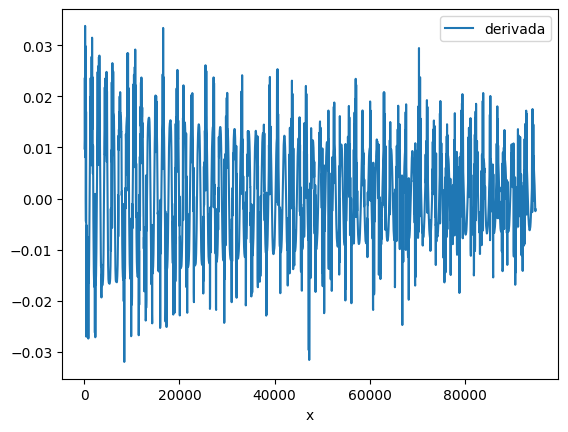

In [12]:
R.plot(x='x',y='derivada')

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.

In [15]:
z, k, q, R = sp.symbols('z k q R')
v=lambda z:(k*q) / sp.sqrt(z**2 + R**2)
df=-sp.diff(v(z),z,1)
E=sp.simplify(df)
Ez= sp.lambdify((z, k, q, R), E, 'numpy')


In [16]:
# Define la función E_z como la derivada de v
E_z = df
E_z

k*q*z/(R**2 + z**2)**(3/2)

In [17]:
E_z_func = sp.lambdify((z, k, q, R), E_z, 'numpy')
print(E_z_func)

<function _lambdifygenerated at 0x79d0ac196830>


In [18]:
R= 0.1E-3  # en metros
k= 8.9E10
q=0.1E-6
zv =0.1E-3
E_z_func(zv,k,q,R)

314662517628.0136

In [19]:
R= 0.1E-3  # en metros
k= 8.9E10
q=0.1E-6
z =np.linspace(0.1e-3, 1e-2, 500)
v = (k*q) / np.sqrt(z**2 + R**2)

# Gradiente
Eg = -np.gradient(v,z)

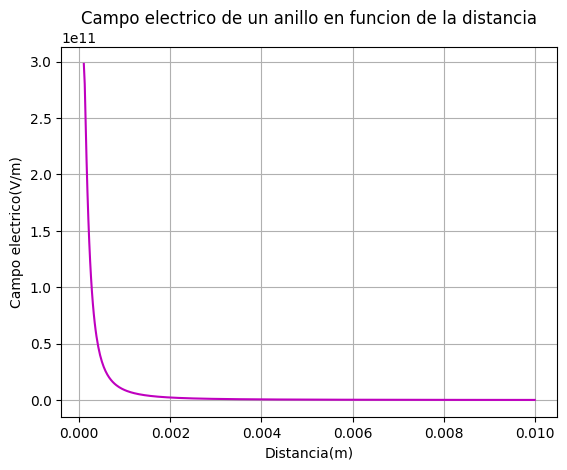

In [20]:
plt.figure()
plt.plot(z,Eg, 'm')
plt.title('Campo electrico de un anillo en funcion de la distancia')
plt.xlabel('Distancia(m)')
plt.ylabel('Campo electrico(V/m)')
plt.grid()